## Jonathan Alexis Urrutia Anguiano        414011025
### Física computacional
### Ricardo Mendez

# Examen 3

In [1]:
from pylab import *
from scipy.special import *
%matplotlib inline

#### Ejercicio 1: Graficar las funciones Bessel de primer tipo de orden 0, 1, 2 y 3 en la misma gráfica.

Se define primero el intervalo a graficar, que es de $0$ a $2\pi$ con la variable $x$ y un $arange$. Asimimso se devine la lista de los órdenes que se piden graficar. Finalmente, con un ciclo $for$ se grafican las funciones y son etiquetadas. El comando $show()$ se escribe fuera del ciclo para que todo esté en la misma gráfica.


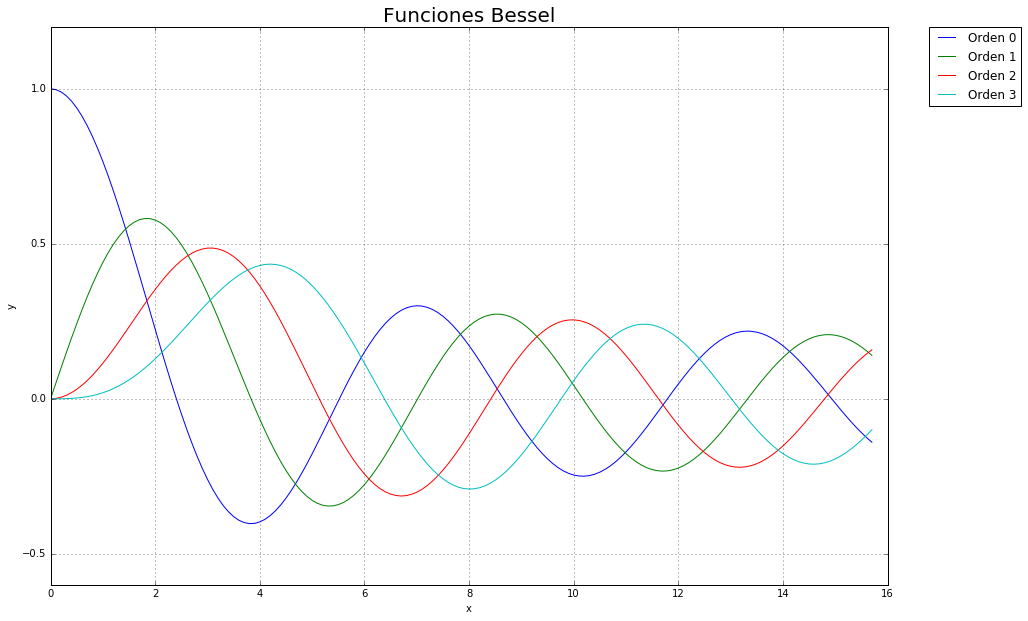

In [2]:
x = arange(0,5*pi,.1)
m = array([0,1,2,3])

fig, ax = plt.subplots(figsize=(15,10))

for i in m:
    plot(x,jv(i,x), label = 'Orden %s' % (str(i)))
    
grid(True)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
title('Funciones Bessel', fontsize=20),xlabel('x'),ylabel('y')
show()

#### Ejercicio 2: Programar la derrivada numérica de una función y comparar con el resultado analítico.

La función para corroborar es 
$$ y (x) =x^3 - 5 x +2 \\
  y'(x) = 3 x^2 -5
$$

In [3]:
def ej_3(x):
    return x**3 - 5*x + 2

def dej_3(x):
    return 3*x**2 - 5

Se define la derivada numérica como se indica en el examen.

In [4]:
def deriv_num(func,x_0, h=1e-4):
    return (func(x_0+h)-func(x_0))/(h)

Se grafica la función original, su derivada analítica y su derivada numérica en la misma imagen. La sol. analítica y la numérica están sobrepuestas.

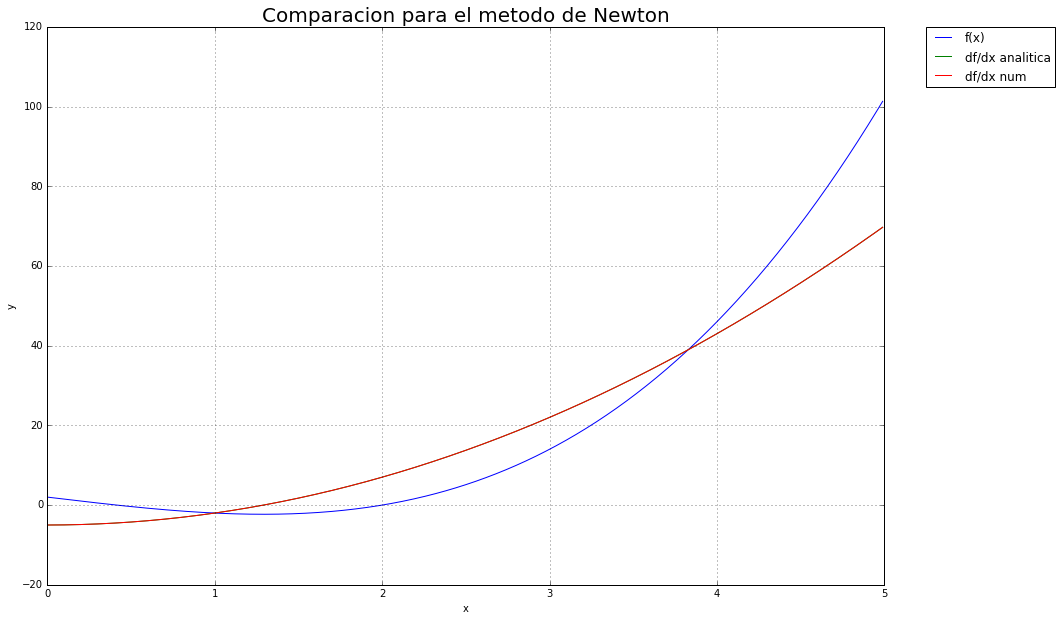

In [5]:
x = arange(0,5,.01)
fig, ax = plt.subplots(figsize=(15,10))

title('Comparacion para el metodo de Newton', fontsize=20),xlabel('x'),ylabel('y')
plot(x,ej_3(x), label = 'f(x)')
plot(x,dej_3(x), label = 'df/dx analitica' )
plot(x,deriv_num(ej_3,x), label = 'df/dx num')
grid(True)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
show()

#### Ejercicio 3: Programar el método de Newton-Raphson para encontrar raíces y comprobor que funciona con la función dada.

La función para corroborar es 
$$ y (x) = \sin (3 x) +\frac12 \cos^2(2x)$$

In [6]:
def ej_3(x):
    return sin(3*x) + 0.5*cos(2*x)**2    

Primero se hará un barrido en pasos de $10^{-2}$ para encontrar candidtos a raices. Se multiplicará el paso $i$ por el $i+1$ y si el producto es negativo significa que hubo un cambio de signo y necesariamente hay una raíz entre estos valores. El paso $i$ es un candidato a raíz. Con esto en mente es aplicado el método de Newton y para este, es ncesario programar la derivada numérica usada con anterioridad. Estos tres pasos son programados en la sigiuente celda.

In [7]:
def pseudoraices(func, intervalo, h=1e-2):
    tiempo = arange(intervalo[0],intervalo[1]+h,h)
    roots = []
    
    for i in xrange(len(tiempo)-1):
        f_l, f_r = func(tiempo[i]) , func(tiempo[i+1])
        if f_l*f_r<=0:
            roots.append(tiempo[i])
    return roots   

def Newton_Raphson(func,x_0, err = 1e-8):
    while abs(func(x_0)) >= err:
        root = x_0 - func(x_0)/deriv_num(func,x_0)
        x_0 = root
    return root

Finalme se hace un ciclo for en donde se somenten al método de Newton todos los candidatos a raíces y se grafican. Cabe mencionar que si se aproximala dericada numérica a un mejor orden, la presición de las raices mejora.

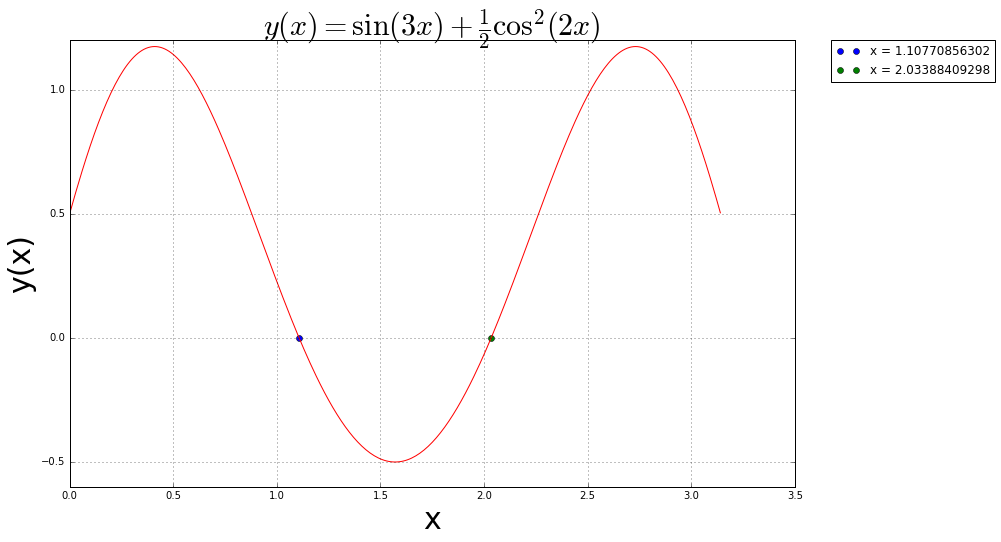

In [8]:
fig, ax = plt.subplots(figsize=(13, 8))
grid(True)

title(r'$y (x) = \sin (3 x) +\frac{1}{2} \cos^2(2x)$',fontsize = 30),
xlabel('x',fontsize=30),ylabel('y(x)',fontsize = 30)

candidatos = pseudoraices(ej_3,[0,pi])
for i in xrange(len(candidatos)):
    root = Newton_Raphson(ej_3,candidatos[i])
    plot([root],[0],'o', label = 'x = '+str(root))
    
time = arange(0,pi,.01)
plot(time,ej_3(time))
ax.legend(bbox_to_anchor=(1.05, 1.0), loc=2, borderaxespad=0.)
show()

#### Ejercicio 4: Comparar los ceros de $J_0 (x)$ calculados con el método de Newton con la derivada numérica y la analítica
No olvidar que
$$ J_0 '(x) = - J_1 (x) $$
Además para poder utilizar las funciones anterires vamos a definir 

In [9]:
def j_0(x):
    return jv(0,x)

Ahora vamos a definir el método de Newton para el caso partícular que nos interesa para usar la solución analítica.

In [10]:
def Newton_Raphson_J_0(func,x_0, err = 1e-8):
    while abs(func(x_0)) >= err:
        root = x_0 - func(x_0)/(-jv(1,x_0))
        x_0 = root
    return root

Son calculados los valores de las raices mediante los dos métodos y el error (la diferencia entre los dos resultados) se muestra. De igual forma, la gráfica y todas las raices encontradas se plotean.

El error de la raiz numero 0 es: 9.80913128501e-11
El error de la raiz numero 1 es: 7.07339964379e-10
El error de la raiz numero 2 es: 4.42312853011e-12


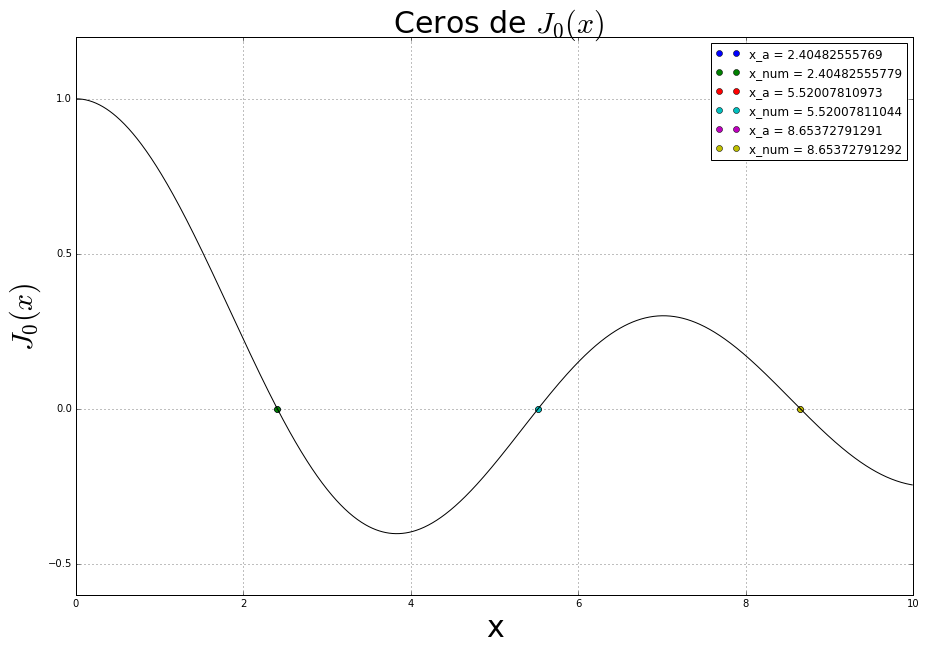

In [11]:
fig, ax = plt.subplots(figsize=(15, 10))
grid(True)

title(r' Ceros de $J_0 (x)$',fontsize = 30),
xlabel('x',fontsize=30),ylabel(r'$J_0 (x)$',fontsize = 30)

candidatos = pseudoraices(j_0,[0,10])
for i in xrange(len(candidatos)):
    root_a = Newton_Raphson_J_0(j_0,candidatos[i])
    plot([root_a],[0],'o', label = 'x_a = '+str(root_a))
    
    root_num = Newton_Raphson(j_0,candidatos[i])
    plot([root_num],[0],'o', label = 'x_num = '+str(root_num))
    
    print 'El error de la raiz numero '+str(i)+' es: '+str(abs(root_num-root_a))
    
time = arange(0,10,.01)
plot(time,j_0(time))
ax.legend( loc='upper right')
show()

#### Ejercicio 5: Hacer un programa que regrese la inversa de una matriz de 2x2

En el código se pide que se ingrese una lista o un array; da igual cuál se utilice y se convierte la varible en array por comodidad del usuario. Se pide que se verifique que la matriz sea en efecto de 2x2. Para que esto sea cierto la longitud del arreglo debe ser igual a dos y la long de cualuier elemento de ésta también debe ser igual a dos. Si las condiciones no se cumplen se le indica al usuario que la matriz no es de dichas dimensiones.

BAjo el supuesto que es de 2x2 se calcula el determinante  y si este es nulo se indica al usuario que la matriz no es invertible. Si no es nulo se procede a calcular la inversa como si se hiciese de forma analítica

In [12]:
def inv_matriz(matriz):
    matriz = array(matriz)
    if len(matriz) == 2 and len(matriz[0]) == 2:
        a, b, c, d = matriz[0,0], matriz[0,1], matriz[1,0], matriz[1,1]
        det = a*d-b*c
        if det == 0:
            m_inv = 'No tiene inversa la matriz'
        else:
            m_inv = array([[d,-b],[-c,a]])/det
    else:
        m_inv = 'La matriz no es de 2x2'
    return m_inv
    

In [13]:
print inv_matriz(array([[1,0,0],[0,1,0],[0,0,1]]))
print inv_matriz(array([[1,0],[1,0]]))
print inv_matriz(array([[1,0],[0,1]]))

La matriz no es de 2x2
No tiene inversa la matriz
[[1 0]
 [0 1]]
